In [1]:
from datetime import date, timedelta, datetime
from dev import *

In [2]:
start_date=date.today()-timedelta(days=365*5)
end_date=date.today()-timedelta(days=1)

In [3]:
time_diff=end_date-start_date
time_diff

datetime.timedelta(days=1824)

In [4]:
date_diff=32
dates_list=[]
for i in range(1,1825):
    if i%date_diff==0:
        dates_list.append(i)

In [5]:
dates=[]
for day in dates_list:
    dt_date=start_date+timedelta(day)
    dates.append(dt_date)

In [6]:
date_pairs=[]
for i in range(len(dates)-1):
    #times_to_run=len(dates)-1
    date_pairs.append([dates[i],dates[i+1]])

In [7]:
date_pairs[0]

[datetime.date(2018, 4, 28), datetime.date(2018, 5, 30)]

In [8]:
df=get_bars_alpaca()

In [9]:
X,y=make_features_targets(df,close=True,volume=True,trade_count=True,vwap=True)

In [10]:
Train=X.loc[str(date_pairs[0][0]):str(date_pairs[0][1])]
Test=X.loc[str(date_pairs[0][1]):str(date_pairs[0][1]+timedelta(days=date_diff))]

In [11]:
X_train_list=[]
X_test_list=[]
y_train_list=[]
y_test_list=[]
for pair in date_pairs:
    X_train_list.append(X.loc[str(pair[0]):str(pair[1])])
    X_test_list.append(X.loc[str(pair[1]):str(pair[1]+timedelta(days=date_diff))])
    y_train_list.append(y.loc[str(pair[0]):str(pair[1])])
    y_test_list.append(y.loc[str(pair[1]):str(pair[1]+timedelta(days=date_diff))])
X_train_list.pop()
y_train_list.pop()
X_test_list.pop()
y_test_list.pop()

,close
timestamp,


In [12]:
predicted_df_list=[]
for i in range(len(X_train_list)):
    predicted_df_list.append(SVM_regressor(X_train_list[i],X_test_list[i],y_train_list[i],y_test_list[i]))

In [19]:
r2_list=[]
for prediction in predicted_df_list:
    r2_list.append(r2(y_actual=prediction.close,y_predicted=prediction.predicted_close))

In [20]:
np.mean(r2_list)

-2.504595711758839

-2.0430447534558076
-4.32043862168795
0.5610550735874789
0.41717701630467274
-0.3083017570296769
-0.1364435777851556
0.4213112132105662
0.22542660312378648
-0.7505489708616968
-0.8008046230815435
-3.7908837509958575
0.31748227015175146
0.173438406298412
-3.528238776843117
0.18604730525508628
-4.081166005064884
0.5958507796056371
-0.027702637077136494
0.7887783612026247
-25.518175214340484
-2.717621764810333
0.08774231677619992
0.336009405204881


C:\Users\pplim\anaconda3\envs\dev\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


-5.3294291522533905
0.3059625472062468
-1.100074740732607
-11.614096971905925
-1.8310893444573466
-21.895856225855198
-2.8812091610859394
-0.003673529578897883
-3.36494226166026
0.07926985441649337
-10.764508028789681
0.0014543732816642008
0.43668675930845835
-0.10301361739584225
-8.805916314970952
-4.830584278256276
0.31670469648373745
-0.7800583159363299
-3.510979109450666
-11.760819434184736
-1.9694949017444952
-3.945340520413657
0.3629128530327098
-0.7361172856017653
0.32044112358928634
-0.011454552211123792
0.698682558620306
0.4882117174481927
-0.17917125259882827
-1.478060514682276
0.02021578536648816


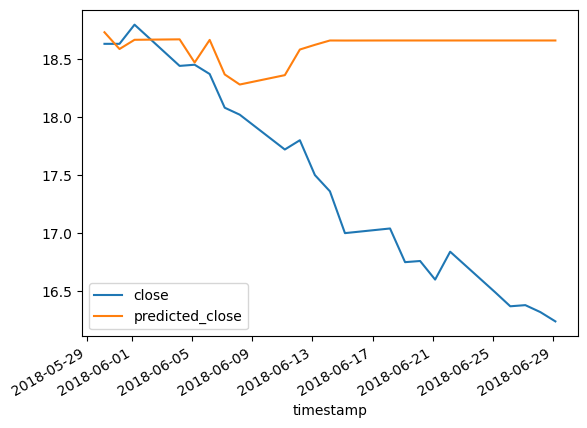

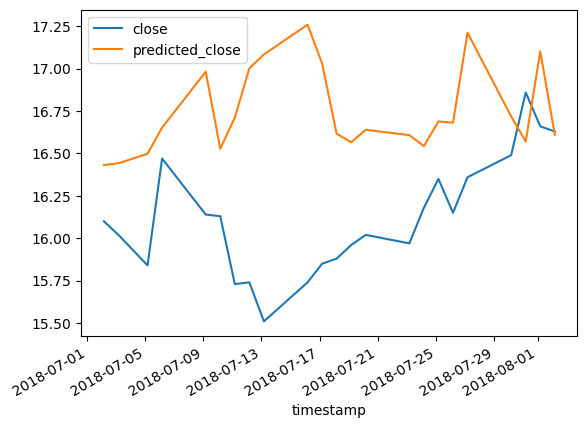

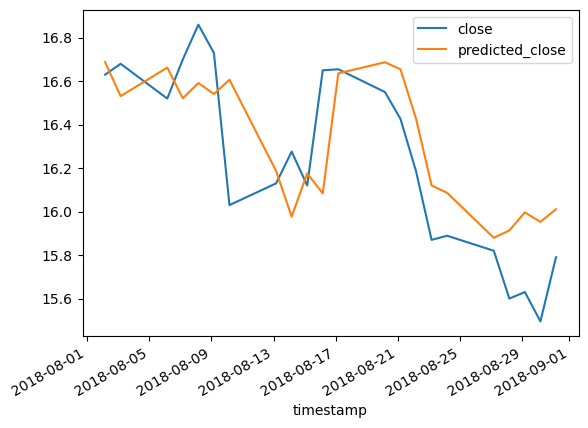

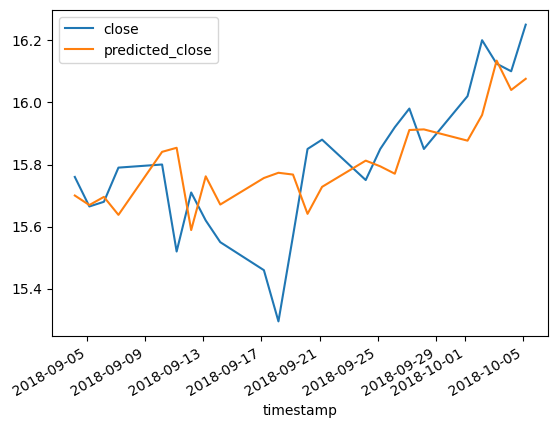

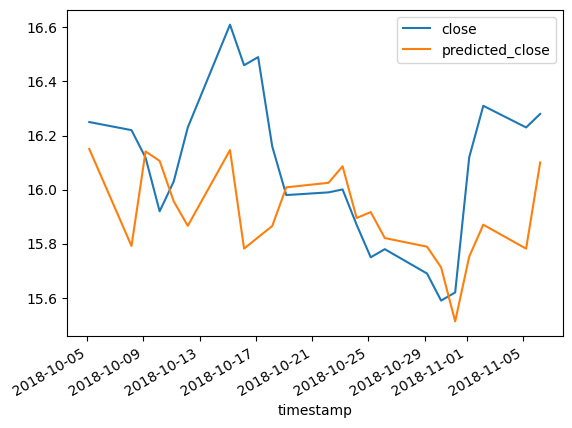

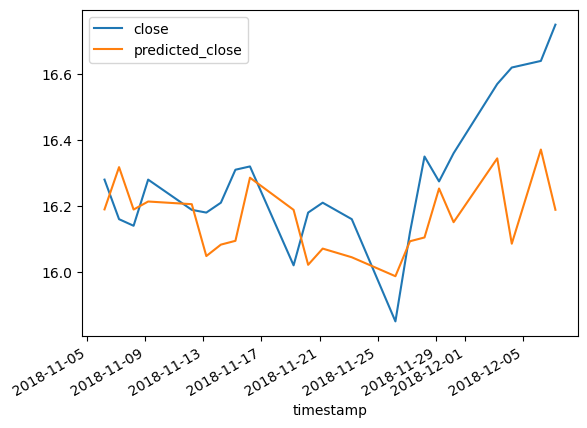

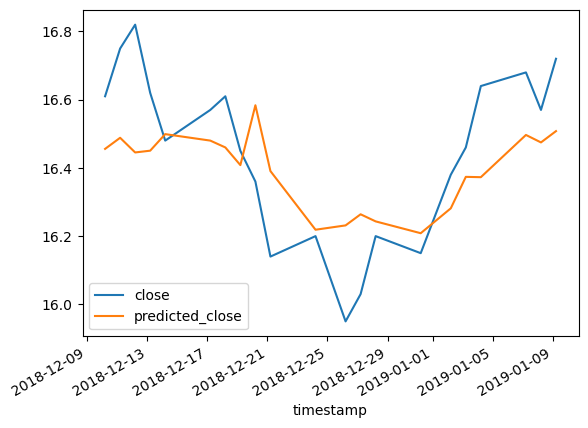

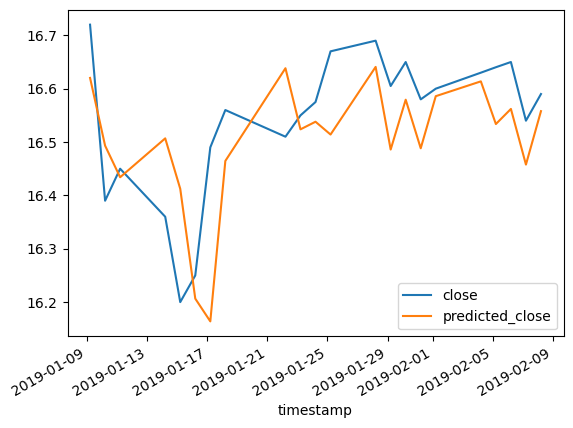

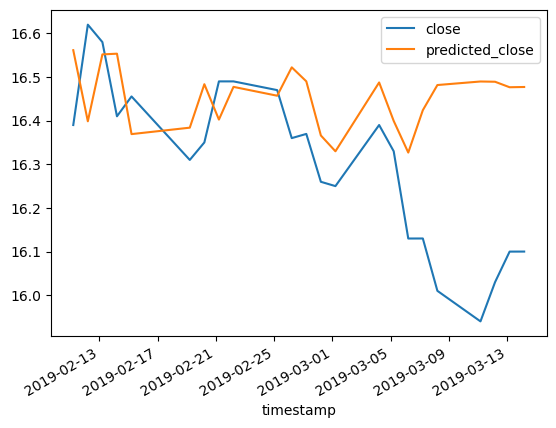

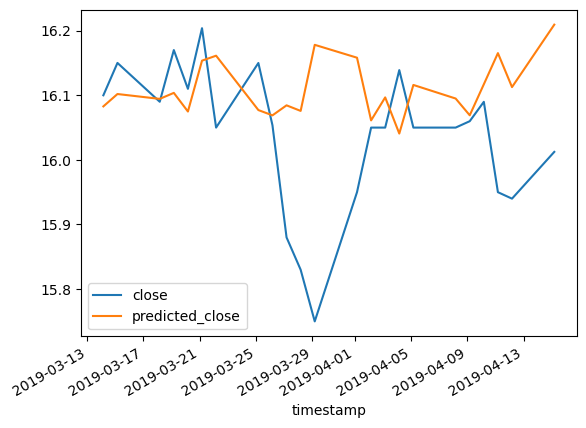

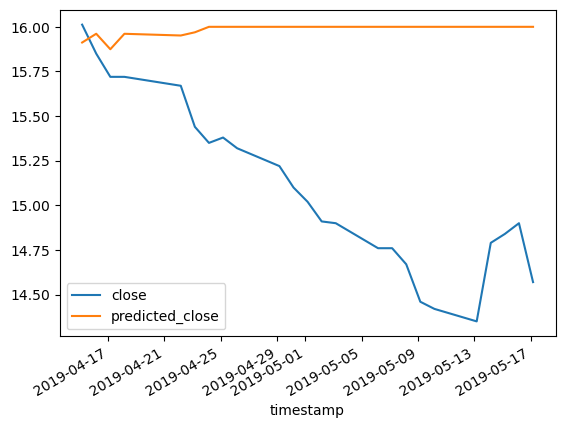

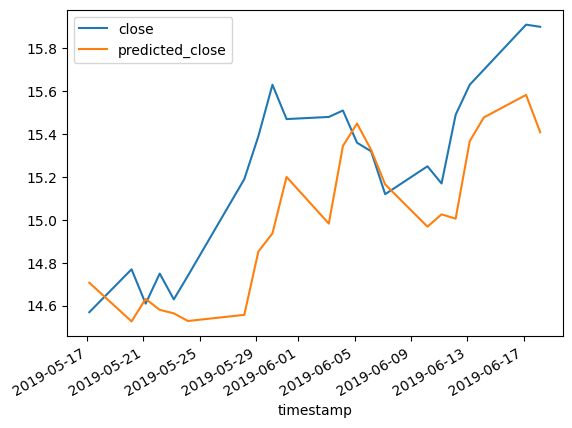

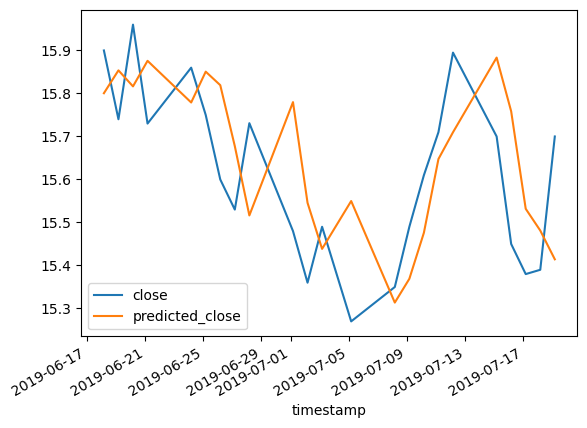

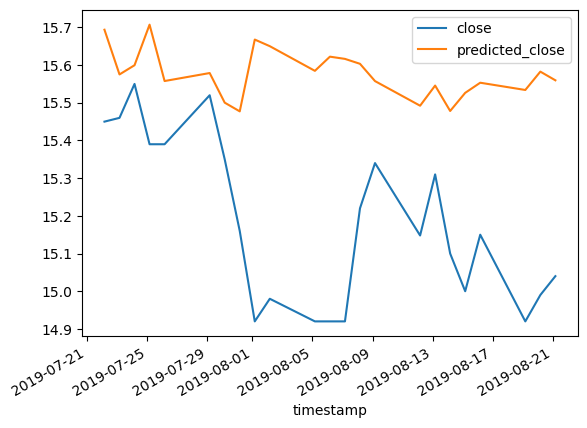

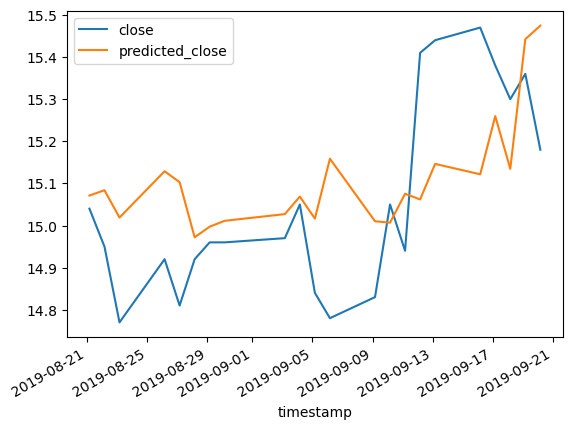

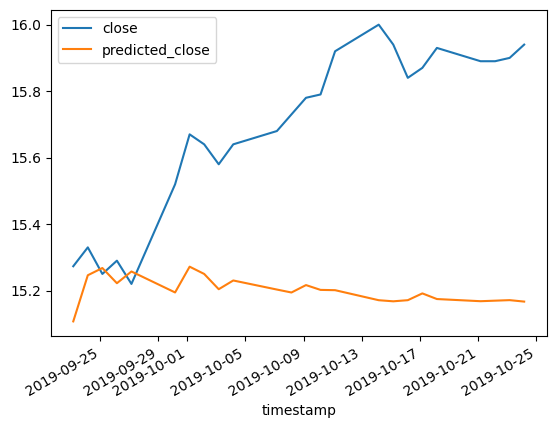

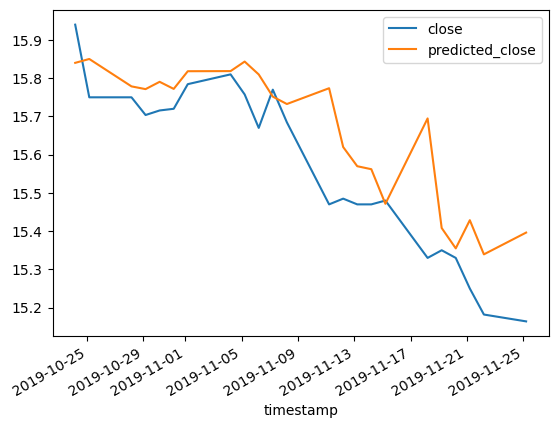

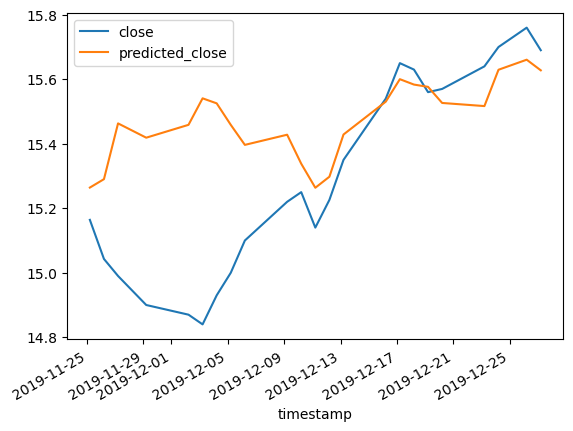

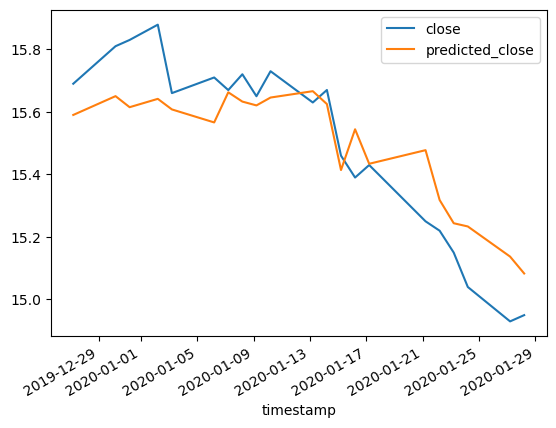

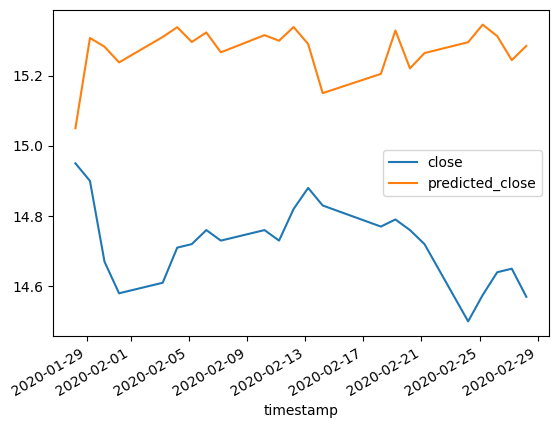

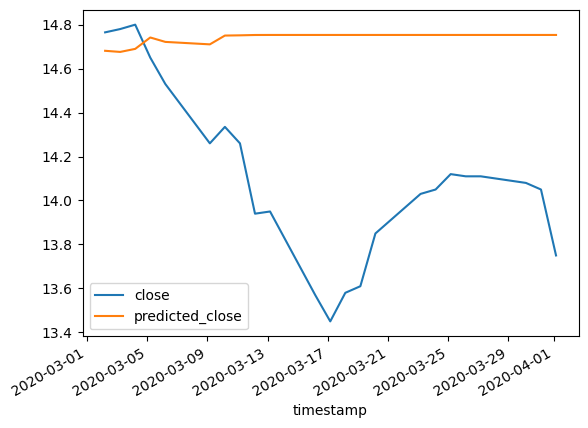

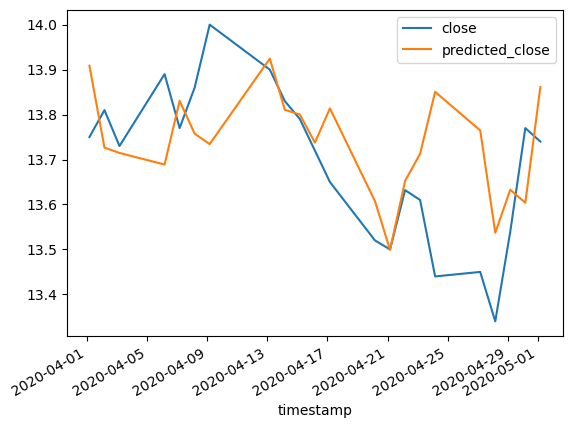

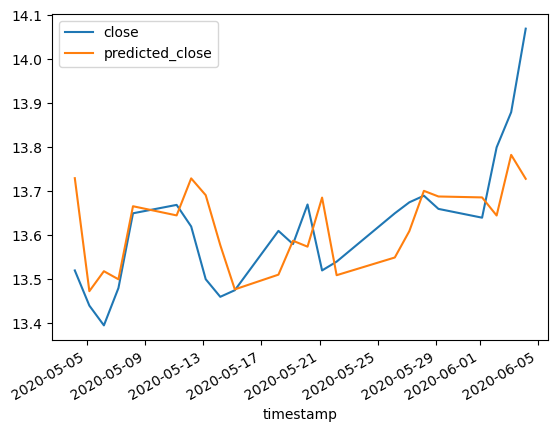

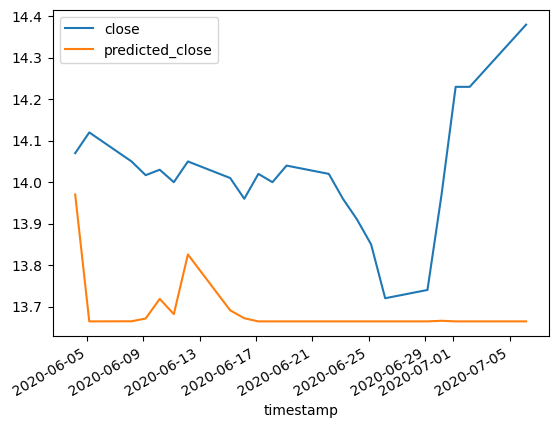

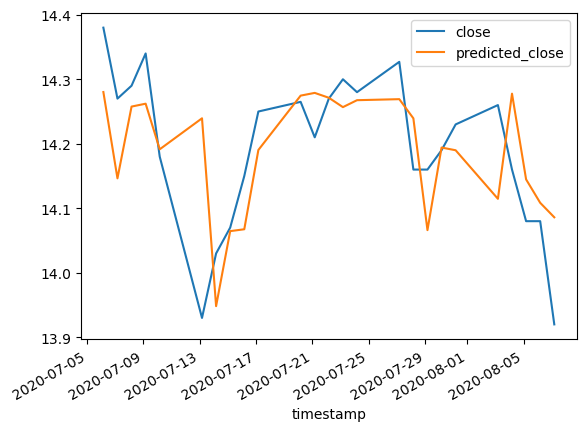

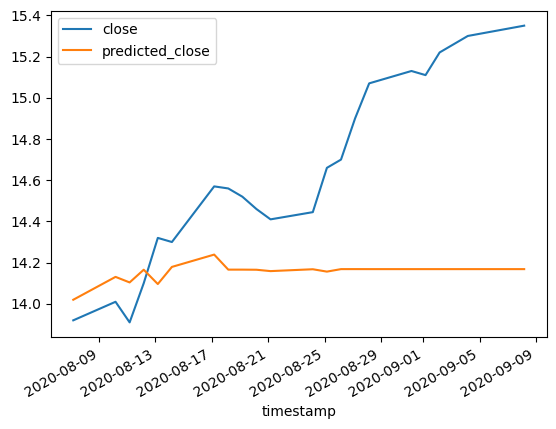

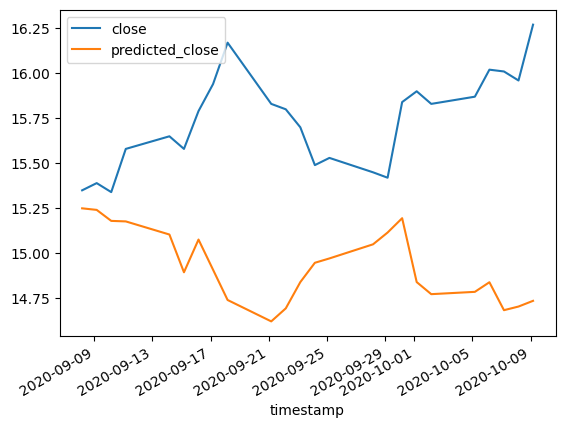

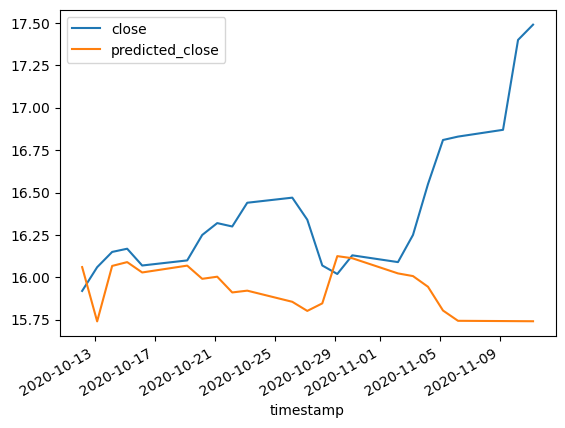

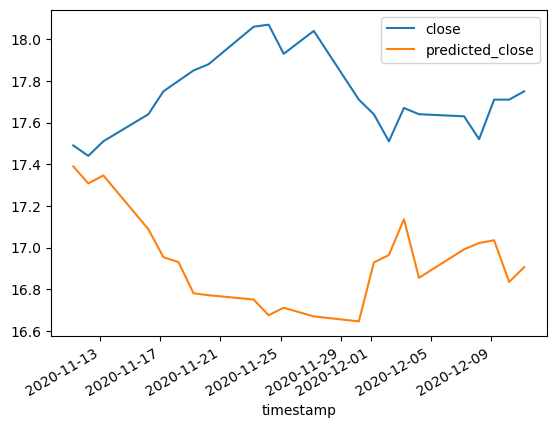

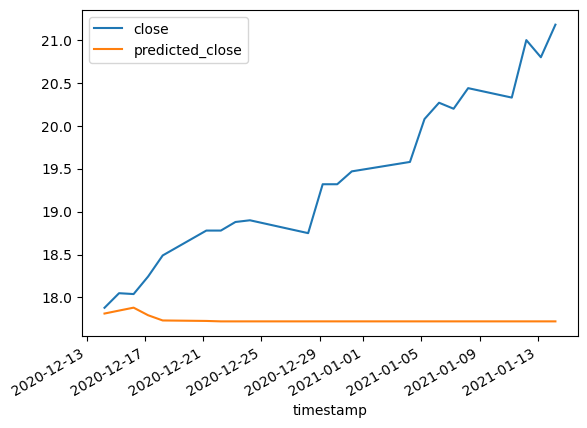

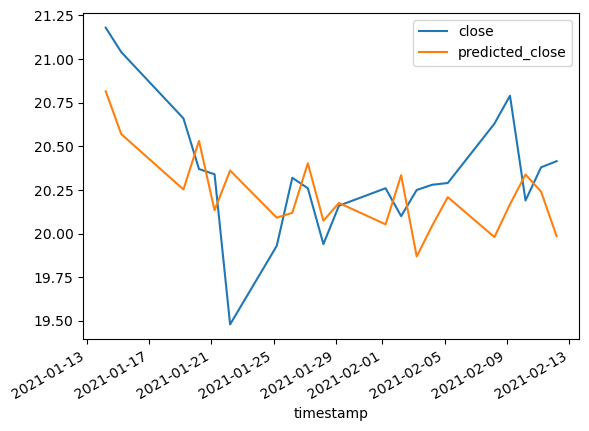

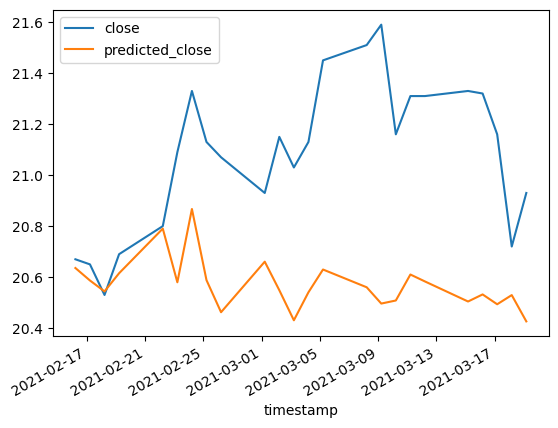

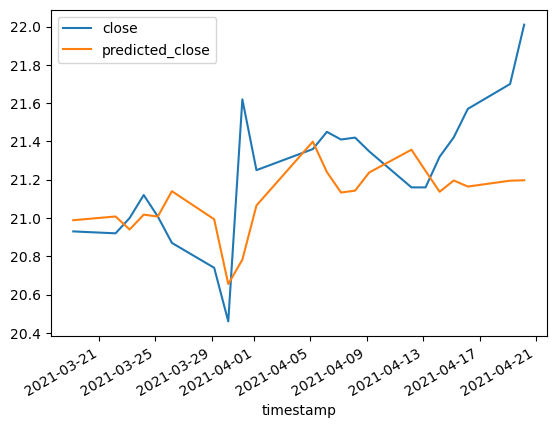

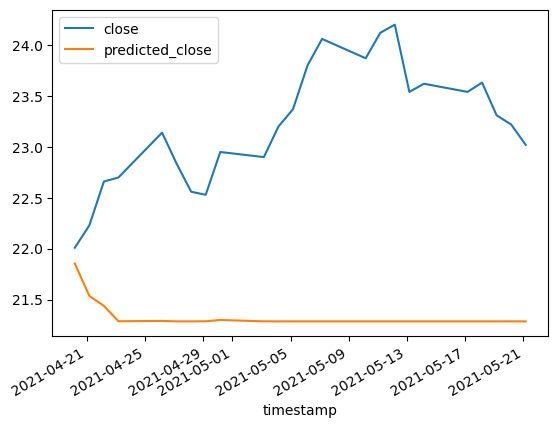

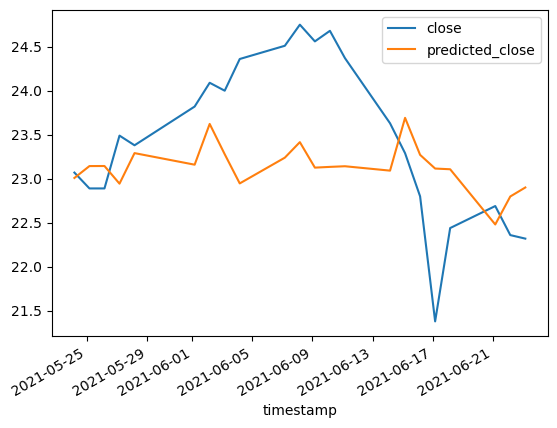

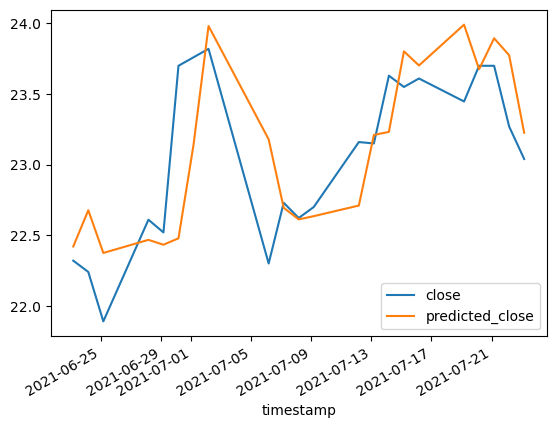

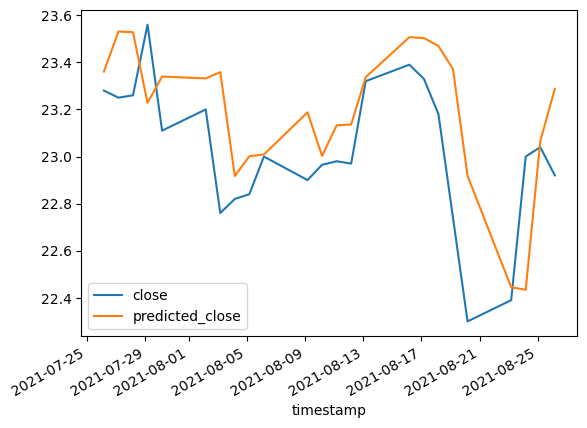

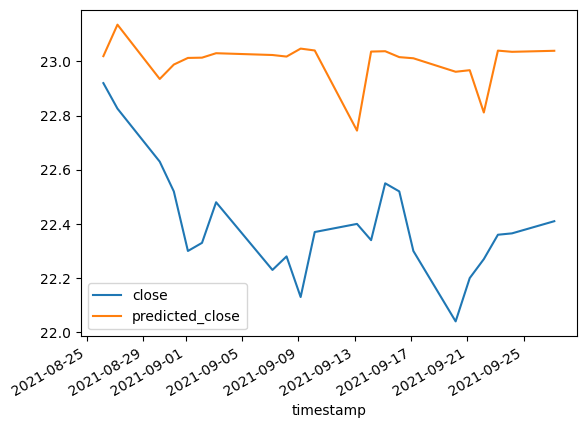

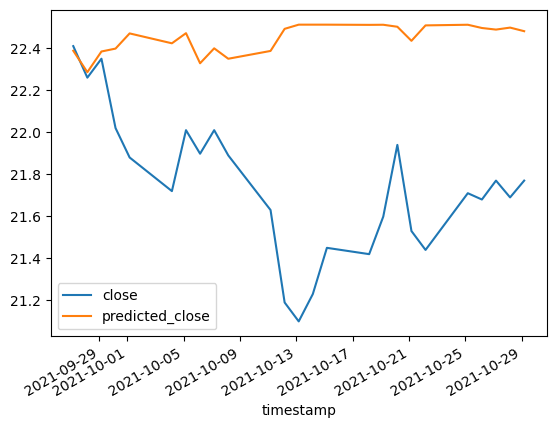

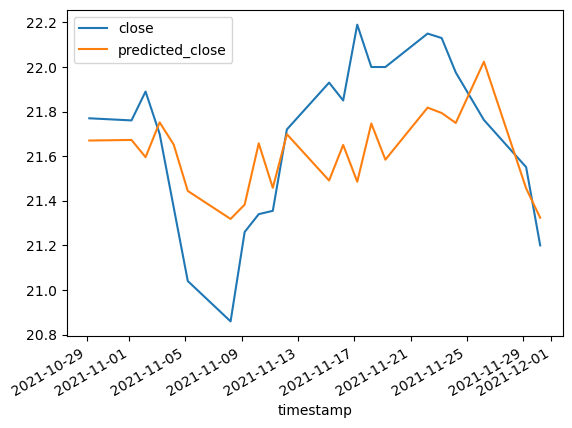

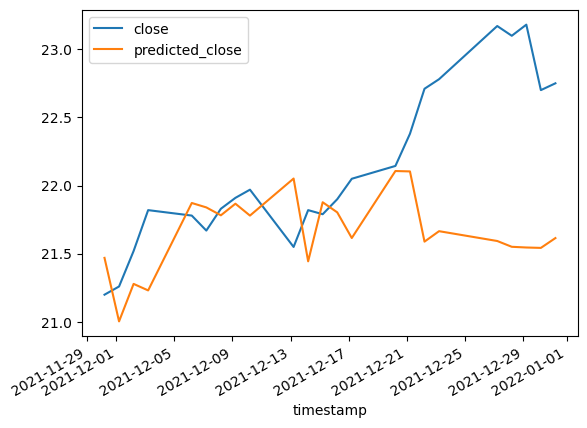

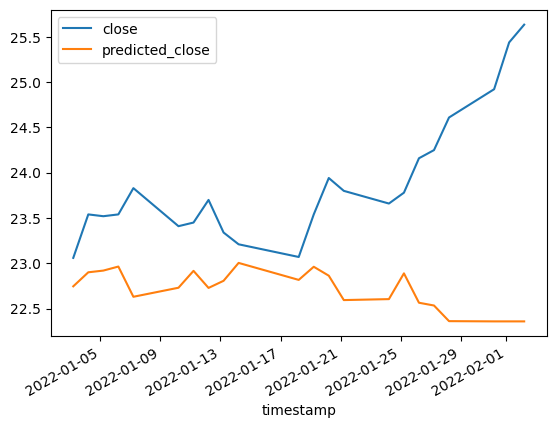

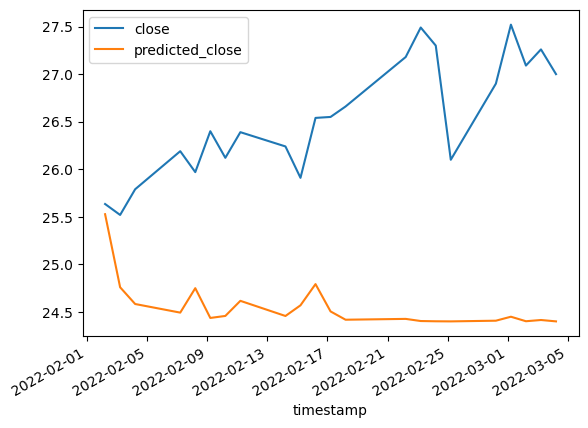

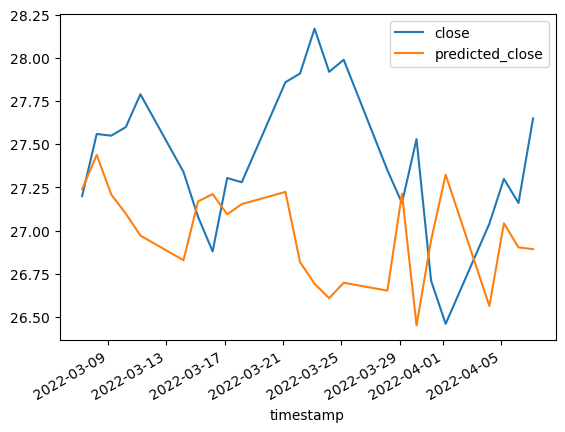

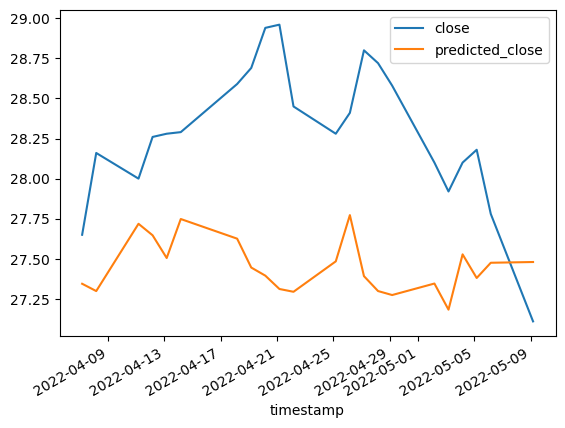

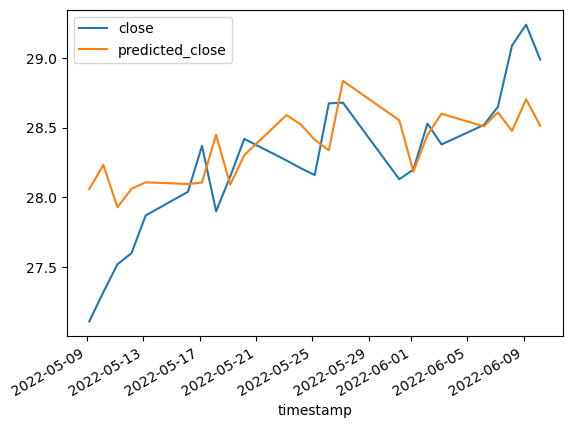

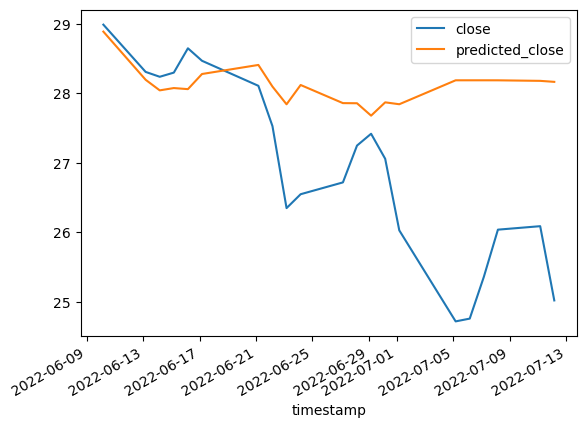

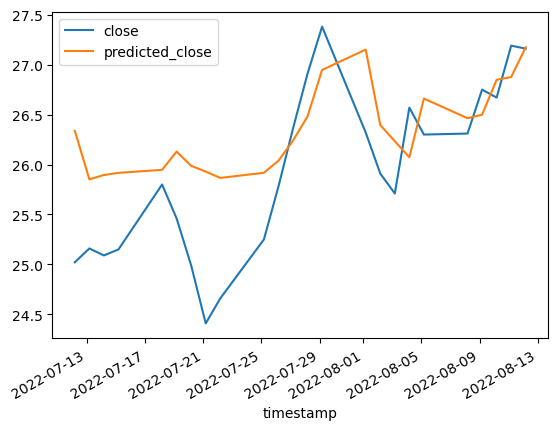

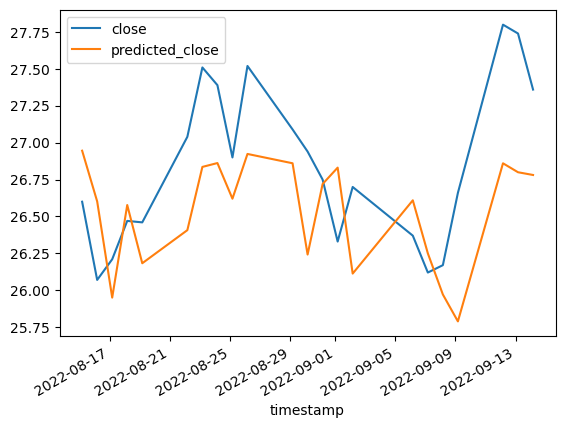

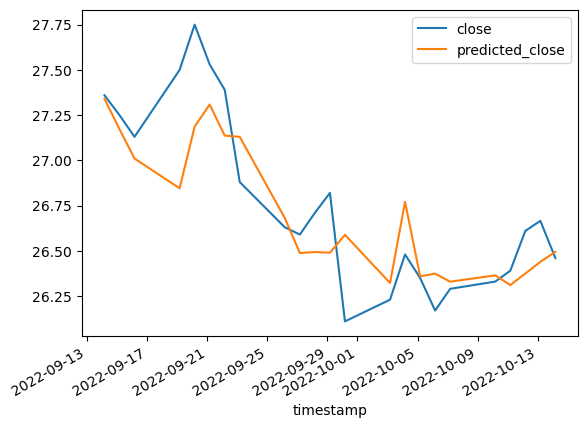

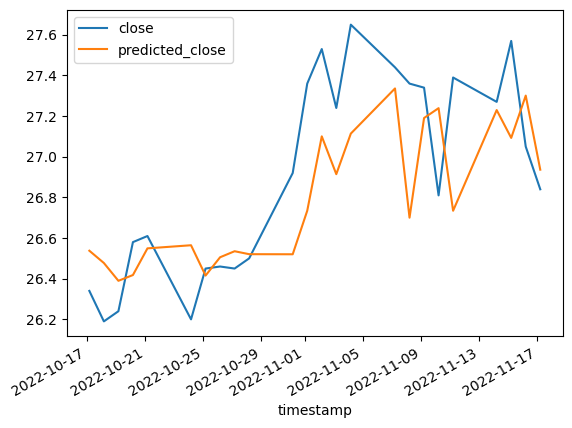

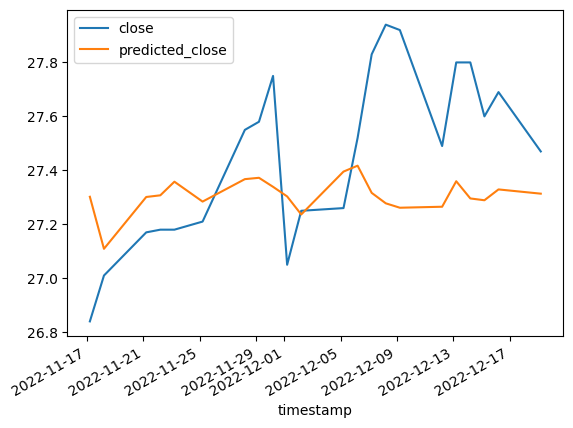

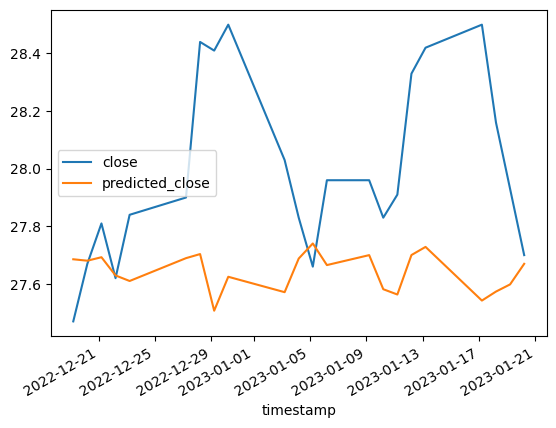

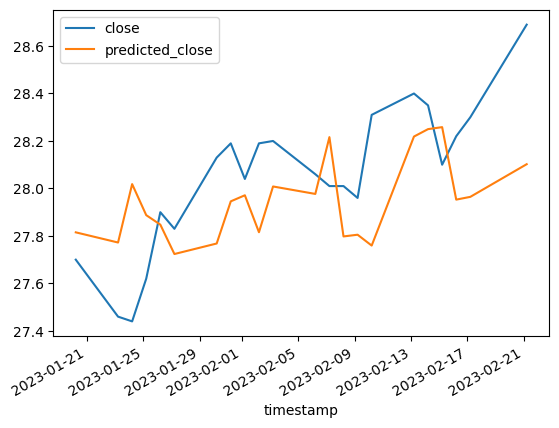

In [18]:
for i in range(len(predicted_df_list)-1):
    predicted_df_list[i].plot()
    print(r2_list[i])